In [1]:
# Core Libraries for Data Manipulation and Analysis
import pandas as pd  # For handling datasets
import numpy as np   # For numerical operations

# Visualization Libraries
import matplotlib.pyplot as plt  
import seaborn as sns            

# For Statistical Analysis
from scipy import stats          


In [17]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("NovaSphere_logistics_raw_data.csv")

# Display the first few rows to confirm the data is loaded correctly
print(df.head())

       Delivery_ID  Delivery_Time_Minutes  Package_Weight_kg  \
0  NovaSphere-0001                     57               6.94   
1  NovaSphere-0002                     66              26.29   
2  NovaSphere-0003                     61               7.87   
3  NovaSphere-0004                     15               8.27   
4  NovaSphere-0005                     55               0.52   

   Carbon_Emissions_kgCO2  Cost_$  
0                    4.27   23.22  
1                   10.70   41.37  
2                    4.22   19.60  
3                   13.58   21.78  
4                    5.75   40.93  


In [3]:
df.info

<bound method DataFrame.info of          Delivery_ID  Delivery_Time_Minutes  Package_Weight_kg  \
0    NovaSphere-0001                     57               6.94   
1    NovaSphere-0002                     66              26.29   
2    NovaSphere-0003                     61               7.87   
3    NovaSphere-0004                     15               8.27   
4    NovaSphere-0005                     55               0.52   
..               ...                    ...                ...   
345  NovaSphere-0346                     63               1.69   
346  NovaSphere-0347                     49              17.86   
347  NovaSphere-0348                     69              12.23   
348  NovaSphere-0349                     37              29.23   
349  NovaSphere-0350                     -1              16.55   

     Carbon_Emissions_kgCO2  Cost_$  
0                      4.27   23.22  
1                     10.70   41.37  
2                      4.22   19.60  
3                     1

In [6]:
df.columns

Index(['Delivery_ID', 'Delivery_Time_Minutes', 'Package_Weight_kg',
       'Carbon_Emissions_kgCO2', 'Cost_$'],
      dtype='object')

In [4]:
df.shape

(350, 5)

In [10]:
num_rows = (df['Delivery_Time_Minutes'] == -1).sum()
print(num_rows)


15


In [11]:
num_rows = (df['Carbon_Emissions_kgCO2'] == 9999).sum()
print(num_rows)


10


In [13]:
num_rows = (df['Cost_$'] == 0).sum()
print(num_rows)


7


In [14]:
# Drop rows with missing values
df = df.dropna()

# Check if any missing values remain
print(df.isnull().sum())


Delivery_ID               0
Delivery_Time_Minutes     0
Package_Weight_kg         0
Carbon_Emissions_kgCO2    0
Cost_$                    0
dtype: int64


In [15]:
df.shape

(338, 5)

In [16]:
df = df[df["Delivery_Time_Minutes"] != -1]
df.shape

(324, 5)

In [24]:
df.to_csv("cleanFile.csv", index=False)


In [25]:
df.to_excel("cleanFile.xlsx", index=False, engine='openpyxl')


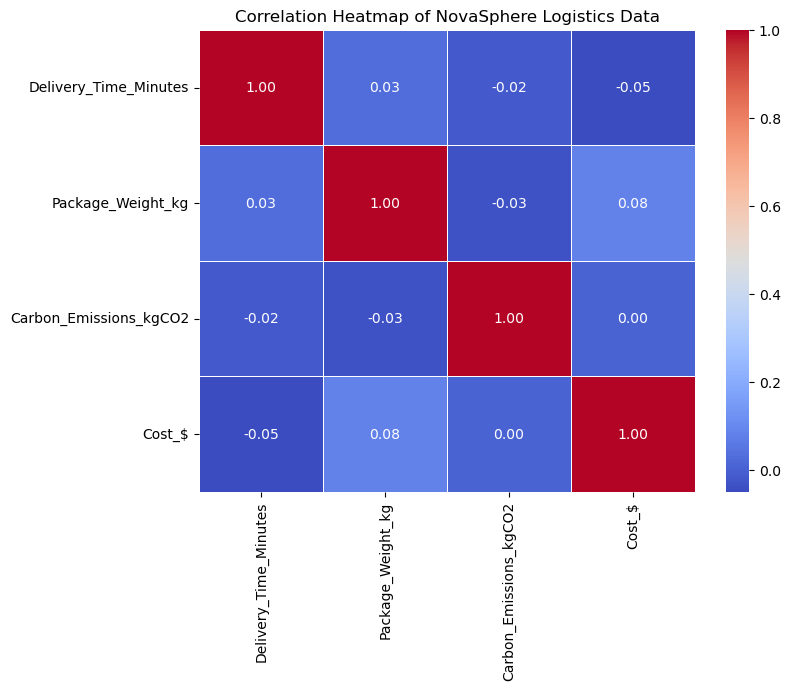

In [26]:
# Drop the ID column for analysis
df_corr = df.drop(columns=["Delivery_ID"])

# Compute the correlation matrix
corr_matrix = df_corr.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of NovaSphere Logistics Data")
plt.show()

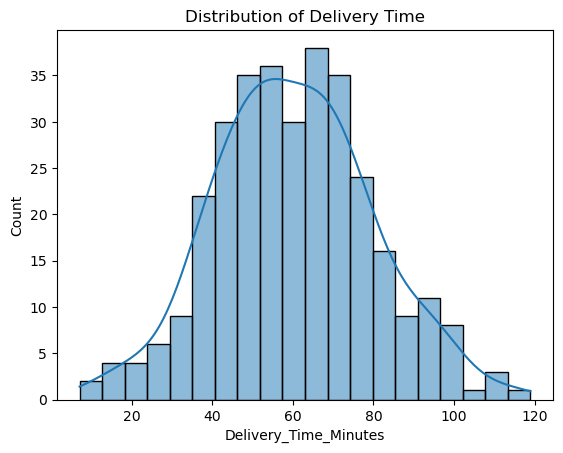

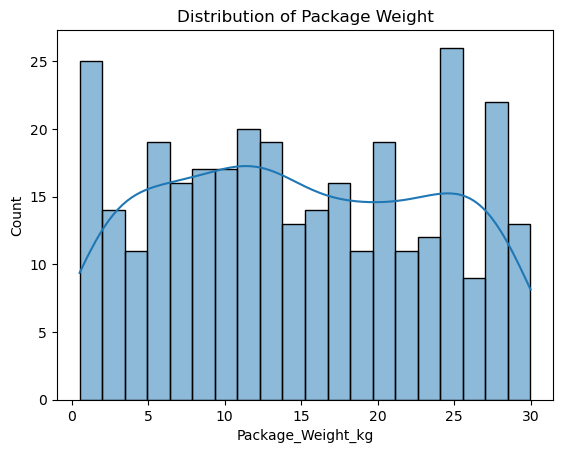

In [27]:
# Histogram for Delivery Time
sns.histplot(df["Delivery_Time_Minutes"], bins=20, kde=True)
plt.title("Distribution of Delivery Time")
plt.show()

# Histogram for Package Weight
sns.histplot(df["Package_Weight_kg"], bins=20, kde=True)
plt.title("Distribution of Package Weight")
plt.show()


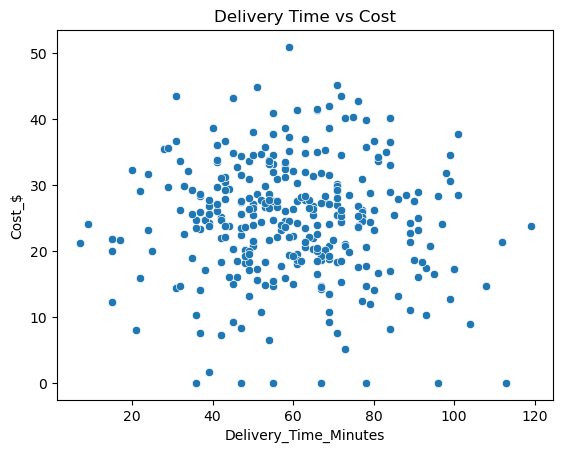

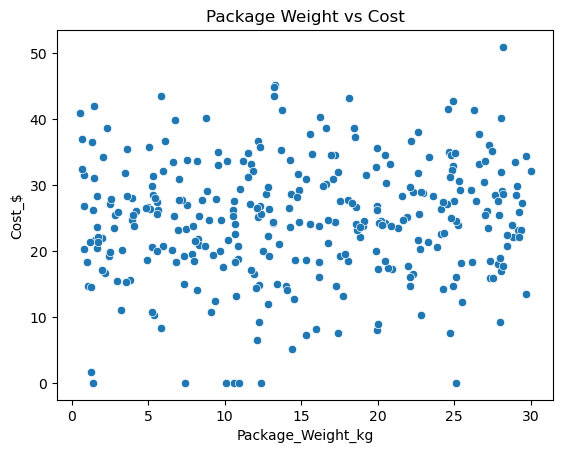

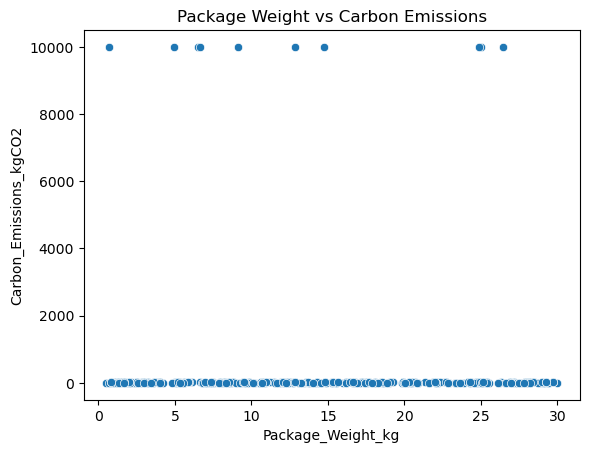

In [28]:
# Delivery Time vs Cost
sns.scatterplot(x=df["Delivery_Time_Minutes"], y=df["Cost_$"])
plt.title("Delivery Time vs Cost")
plt.show()

# Package Weight vs Cost
sns.scatterplot(x=df["Package_Weight_kg"], y=df["Cost_$"])
plt.title("Package Weight vs Cost")
plt.show()

# Carbon Emissions vs Package Weight
sns.scatterplot(x=df["Package_Weight_kg"], y=df["Carbon_Emissions_kgCO2"])
plt.title("Package Weight vs Carbon Emissions")
plt.show()


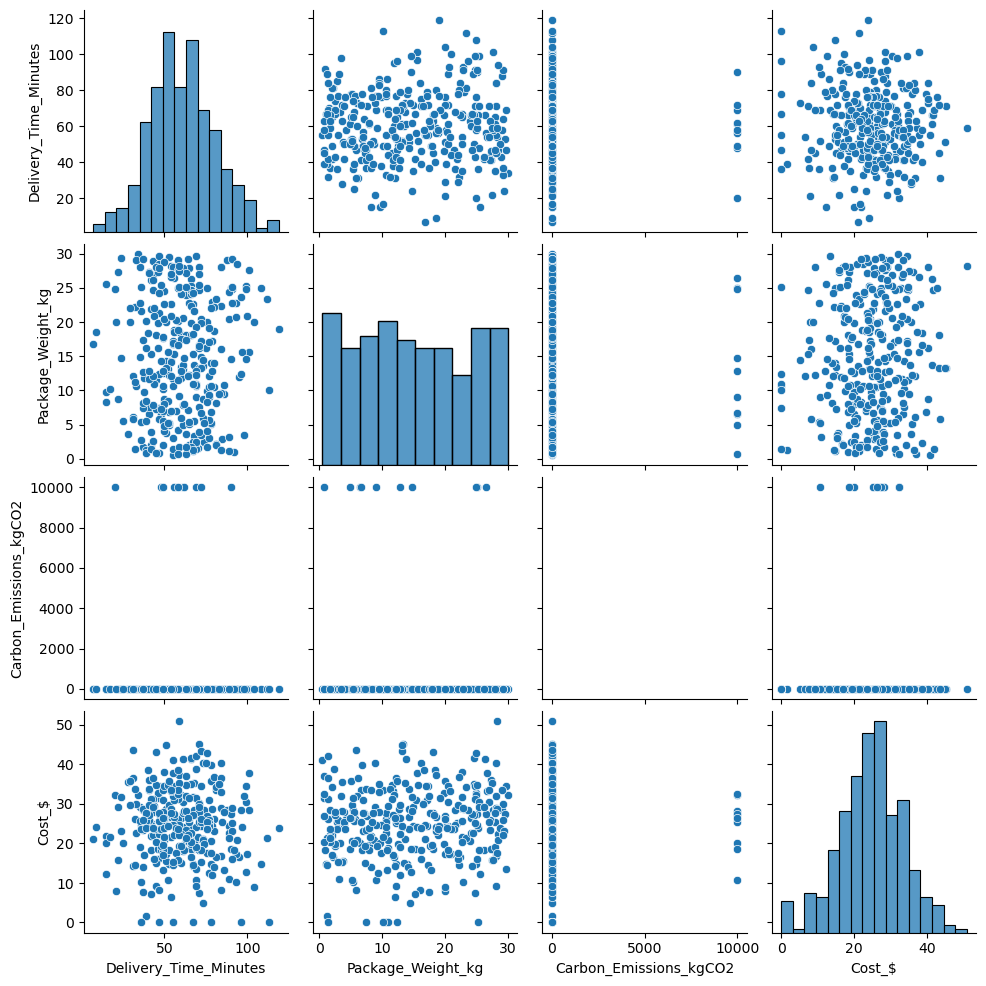

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between variables
sns.pairplot(df.drop(columns=["Delivery_ID"]))
plt.show()


In [17]:
df = df[df["Cost_$"] != 0] # dropping them because they are outlier, and we cannot make analysis for rows with external factors affecting the value.


In [18]:
df.shape

(317, 5)

In [19]:
# Compute mean of Carbon Emissions (excluding 9999)
mean_carbon_emission = df.loc[df["Carbon_Emissions_kgCO2"] != 9999, "Carbon_Emissions_kgCO2"].mean()

# Replace 9999 values with the computed mean using .loc[]
df.loc[df["Carbon_Emissions_kgCO2"] == 9999, "Carbon_Emissions_kgCO2"] = mean_carbon_emission

print("Dataset updated: 9999 values replaced with mean.", mean_carbon_emission)

Dataset updated: 9999 values replaced with mean. 7.47814332247557


In [44]:
df.to_excel("cleanFileUpdated.xlsx", index=False, engine='openpyxl')

In [32]:
df.describe()

,Delivery_Time_Minutes,Package_Weight_kg,Carbon_Emissions_kgCO2,Cost_$
count,317.000000,317.000000,317.000000,317.000000
mean,59.924290,14.928517,7.478143,25.215962
std,19.406721,8.704243,4.080541,8.275721
min,7.000000,0.520000,0.200000,1.560000
25%,47.000000,7.490000,4.220000,19.600000
50%,59.000000,14.390000,7.478143,25.320000
75%,72.000000,22.650000,10.700000,30.850000
max,119.000000,29.990000,14.970000,50.940000


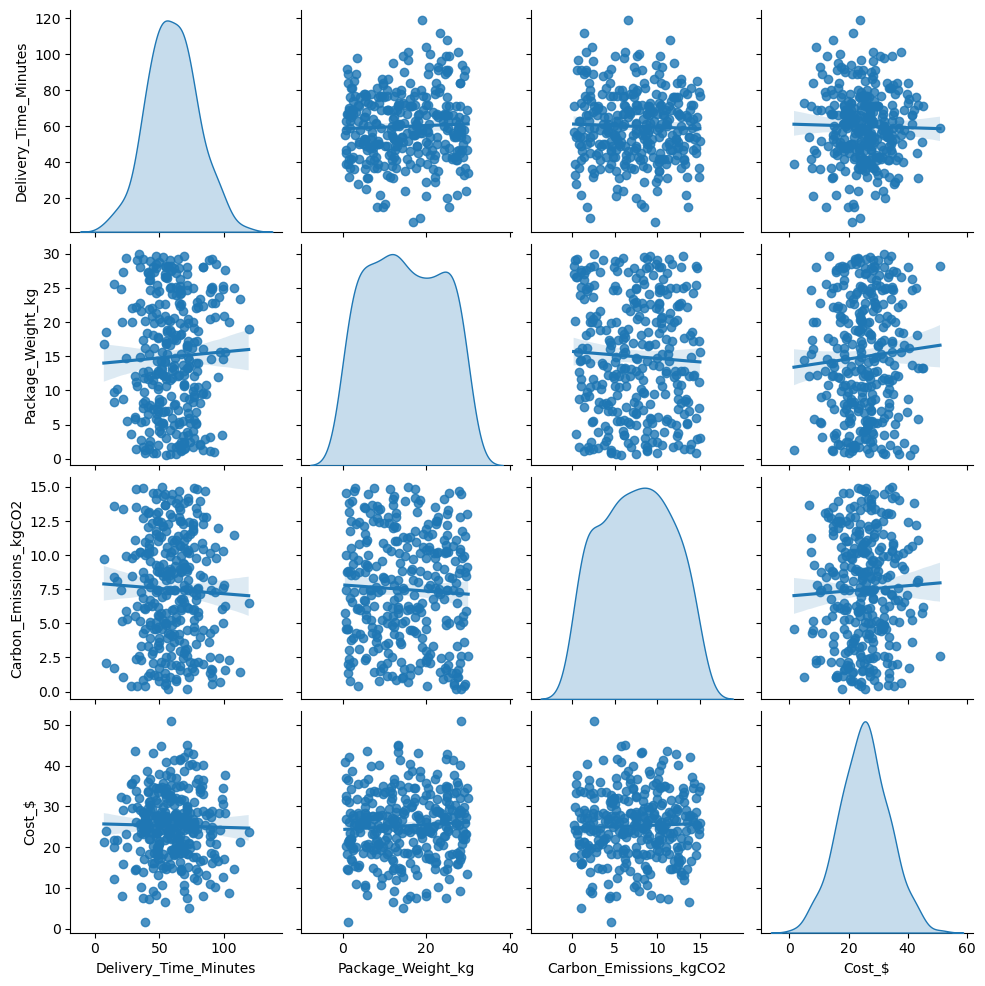

In [33]:
# Pairplot with regression line
sns.pairplot(df.drop(columns=["Delivery_ID"]), kind="reg", diag_kind="kde")

plt.show()


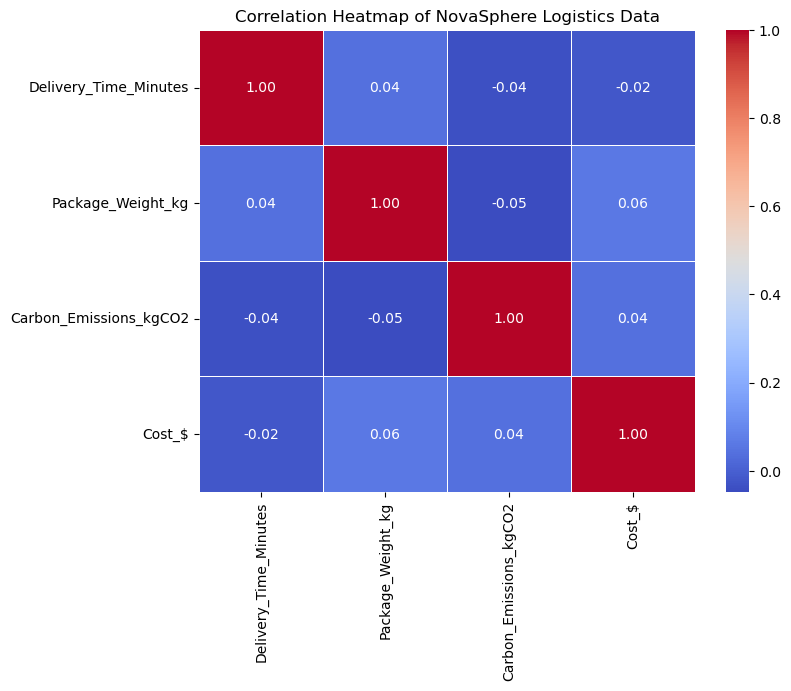

In [35]:
# Set figure size
plt.figure(figsize=(8, 6))

correlation_matrix = df.drop(columns=["Delivery_ID"]).corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of NovaSphere Logistics Data")

# Show plot
plt.show()


In [ ]:
"""

There is no evident correlation between any variable

"""

In [38]:
## Each elements analysis vs cost

In [39]:
# Weight vs Cost

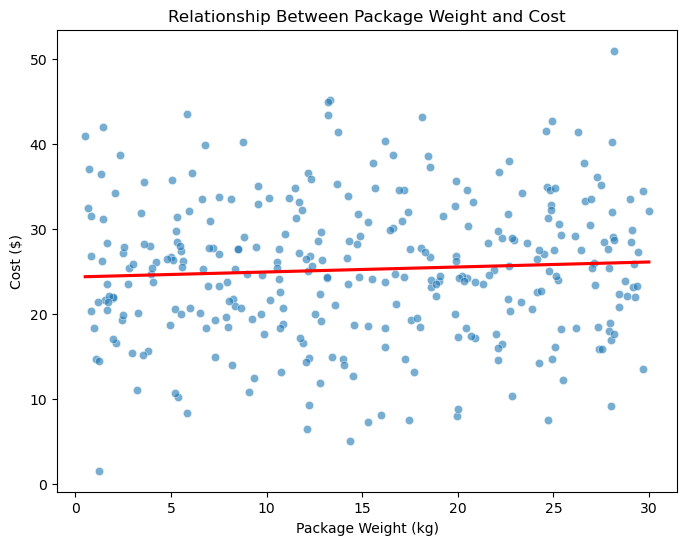

In [36]:
# Set figure size
plt.figure(figsize=(8, 6))

correlation_cost_weight = df["Package_Weight_kg"].corr(df["Cost_$"])

# Scatter plot of Package Weight vs Cost
sns.scatterplot(x=df["Package_Weight_kg"], y=df["Cost_$"], alpha=0.6)

# Regression line
sns.regplot(x=df["Package_Weight_kg"], y=df["Cost_$"], scatter=False, color='red', ci=None)

# Labels and title
plt.xlabel("Package Weight (kg)")
plt.ylabel("Cost ($)")
plt.title(f"Cost vs. Package Weight\nCorrelation: {correlation_cost_weight:.2f}")

# Show the plot
plt.show()


In [37]:
# Very weak positive correlation between weight vs cost.

In [20]:
# Define weight categories
df.loc[:, "Weight_Category"] = pd.cut(df["Package_Weight_kg"], bins=[0, 10, 20, 30], labels=["0-10 kg", "10-20 kg", "20-30 kg"])

# Compute average cost per weight category (explicitly setting observed=True to handle category data correctly)
avg_cost_per_weight_group = df.groupby("Weight_Category", observed=True)["Cost_$"].mean().reset_index()

# Display the table
print(avg_cost_per_weight_group)


  Weight_Category     Cost_$
0         0-10 kg  24.722453
1        10-20 kg  25.240566
2        20-30 kg  25.689333


In [45]:
''' Observations:
Cost slightly increases with weight:

0-10 kg: $24.72
10-20 kg: $25.24
20-30 kg: $25.69
The difference is small, meaning weight is not a strong driver of cost.
Other factors likely impact cost more:

Distance, route optimization, or delivery time might be playing a bigger role.
Heavier packages might be optimized for bulk shipments.'''

"""
 Insights from the Scatter Plot (Package Weight vs Cost)
General Trend:

The red regression line shows a slight positive correlation between package weight and cost.
This means heavier packages tend to cost more, but the relationship is not very strong.
Variation in Costs:

Some lightweight packages (<10 kg) have high costs, indicating other cost factors beyond weight (e.g., distance, urgency, logistics inefficiencies).
Some heavy packages (~25-30 kg) have low costs, suggesting possible discounts or optimized routes for bulk deliveries.
"""

'\n Insights from the Scatter Plot (Package Weight vs Cost)\nGeneral Trend:\n\nThe red regression line shows a slight positive correlation between package weight and cost.\nThis means heavier packages tend to cost more, but the relationship is not very strong.\nVariation in Costs:\n\nSome lightweight packages (<10 kg) have high costs, indicating other cost factors beyond weight (e.g., distance, urgency, logistics inefficiencies).\nSome heavy packages (~25-30 kg) have low costs, suggesting possible discounts or optimized routes for bulk deliveries.\n'

In [46]:
# Delivery vs Cost

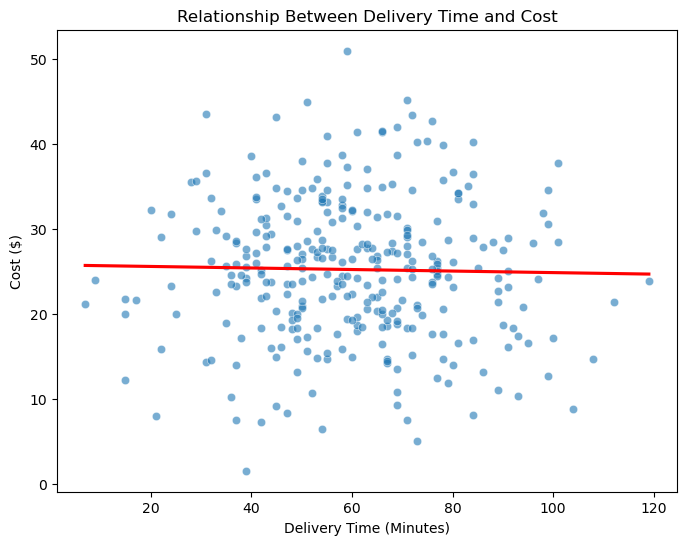

In [39]:
# Set figure size
plt.figure(figsize=(8, 6))
correlation_cost_deliverytime = df["Package_Weight_kg"].corr(df["Delivery_Time_Minutes"])

# Scatter plot of Delivery Time vs Cost
sns.scatterplot(x=df["Delivery_Time_Minutes"], y=df["Cost_$"], alpha=0.6)

# Regression line
sns.regplot(x=df["Delivery_Time_Minutes"], y=df["Cost_$"], scatter=False, color='red', ci=None)

# Labels and title
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Cost ($)")
plt.title(f"Relationship Between Delivery Time and Cost: {correlation_cost_weight:.2f}")

# Show the plot
plt.show()

In [ ]:
'''
Correlation Coefficient:

A value close to 0 confirms that there's no strong relationship between delivery time and cost.

No clear trend between weight and cost within delivery time → Cost isn't strongly influenced by weight alone.

Takeaways:

Longer delivery times do not necessarily mean higher costs.
Weight categories do not significantly impact cost trends.
Other factors like route optimization, urgency, or distance might be playing a bigger role.
'''

In [49]:
# Let us look into carbon emission vs other  metrics

In [50]:
# Carbon emission vs weight

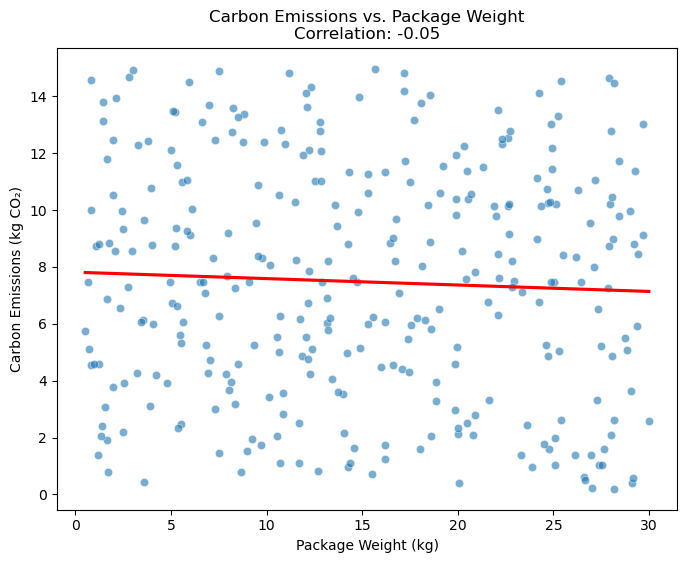

In [40]:
# Compute correlation coefficients
correlation_emissions_weight = df["Package_Weight_kg"].corr(df["Carbon_Emissions_kgCO2"])

# Scatter plot of Carbon Emissions vs. Package Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Package_Weight_kg"], y=df["Carbon_Emissions_kgCO2"], alpha=0.6)

# Regression line
sns.regplot(x=df["Package_Weight_kg"], y=df["Carbon_Emissions_kgCO2"], scatter=False, color='red', ci=None)

# Labels and title
plt.xlabel("Package Weight (kg)")
plt.ylabel("Carbon Emissions (kg CO₂)")
plt.title(f"Carbon Emissions vs. Package Weight\nCorrelation: {correlation_emissions_weight:.2f}")

# Show plot
plt.show()


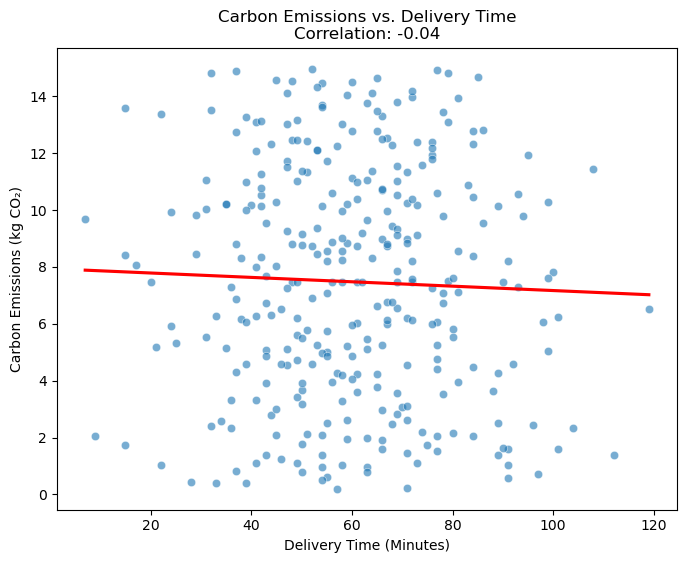

In [52]:
# Compute correlation coefficients
correlation_emissions_time = df["Delivery_Time_Minutes"].corr(df["Carbon_Emissions_kgCO2"])

# Scatter plot of Carbon Emissions vs. Delivery Time
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Delivery_Time_Minutes"], y=df["Carbon_Emissions_kgCO2"], alpha=0.6)

# Regression line
sns.regplot(x=df["Delivery_Time_Minutes"], y=df["Carbon_Emissions_kgCO2"], scatter=False, color='red', ci=None)

# Labels and title
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Carbon Emissions (kg CO₂)")
plt.title(f"Carbon Emissions vs. Delivery Time\nCorrelation: {correlation_emissions_time:.2f}")

# Show plot
plt.show()


In [ ]:
'''
Observations from Carbon Emissions Analysis

Carbon Emissions vs. Package Weight
Correlation: -0.05 → Almost no relationship.
The flat regression line confirms that package weight does not significantly impact carbon emissions.
Possible reasons:
Vehicles may carry multiple packages, making individual package weight irrelevant.
Route optimization and vehicle type (fuel efficiency) may matter more.

Carbon Emissions vs. Delivery Time
Correlation: -0.04 → Again, no strong relationship.
Regression line remains flat, meaning longer delivery times do not directly contribute to higher emissions.
Possible reasons:
Traffic congestion, idling, or stop-and-go driving may influence emissions more than delivery duration.
Different routes (highway vs. urban) might have varied emissions.


Insights from Carbon Emissions Analysis

Carbon Emissions vs. Package Weight
The regression line suggests a weak relationship between weight and emissions.

Possible reasons:
If the company optimizes load balancing, weight alone may not drive emissions.
Other factors like delivery distance, fuel type, or route conditions could be more impactful.

Carbon Emissions vs. Delivery Time
The trend suggests no strong relationship between delivery time and emissions.
Possible reasons:
Longer deliveries don’t always mean more fuel use (e.g., highways vs. city traffic).
Idle time, traffic congestion, or inefficient routing could influence emissions more.


'''

In [ ]:
'''
Key Takeaways

Neither package weight nor delivery time has a strong impact on emissions.
Emissions might be influenced by external factors such as:
Vehicle type & fuel efficiency (gasoline vs. electric).
Route conditions (highway vs. city traffic).

'''

In [53]:
## Cost effiiency 

In [41]:
# Compute efficiency metrics using .loc[]
df.loc[:, "Cost_per_kg"] = df["Cost_$"] / df["Package_Weight_kg"]
df.loc[:, "Cost_per_minute"] = df["Cost_$"] / df["Delivery_Time_Minutes"]

# Generate summary statistics for cost efficiency metrics
efficiency_summary = df[["Cost_per_kg", "Cost_per_minute"]].describe()
print(efficiency_summary)

       Cost_per_kg  Cost_per_minute
count   317.000000       317.000000
mean      3.926886         0.487741
std       7.447670         0.311842
min       0.302589         0.040000
25%       1.116769         0.309545
50%       1.709756         0.418947
75%       3.312623         0.598810
max      78.711538         3.025714


In [42]:
## Delivery time windoes vs cost

C:\Users\nmsud\AppData\Local\Temp\ipykernel_8760\24163328.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_per_time_window = df.groupby("Time_Window")["Cost_$"].mean().reset_index()


  Time_Window     Cost_$
0    0-30 min  23.863125
1   30-60 min  25.692667
2   60-90 min  25.325116
3  90-120 min  22.309545


C:\Users\nmsud\AppData\Local\Temp\ipykernel_8760\24163328.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time_Window", y="Cost_$", data=avg_cost_per_time_window, palette="coolwarm")


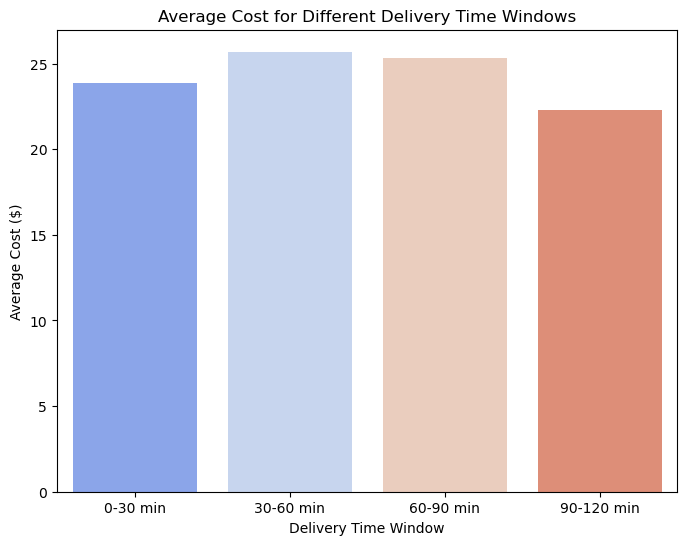

In [21]:
# Define time windows
time_bins = [0, 30, 60, 90, 120]  # Time ranges (in minutes)
time_labels = ["0-30 min", "30-60 min", "60-90 min", "90-120 min"]

# Create a new column for time categories using .loc[] to avoid warnings
df.loc[:, "Time_Window"] = pd.cut(df["Delivery_Time_Minutes"], bins=time_bins, labels=time_labels, include_lowest=True)

# Compute average cost per time window
avg_cost_per_time_window = df.groupby("Time_Window")["Cost_$"].mean().reset_index()

# Display the table
print(avg_cost_per_time_window)

# Plot a bar chart for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x="Time_Window", y="Cost_$", data=avg_cost_per_time_window, palette="coolwarm")

# Labels and title
plt.xlabel("Delivery Time Window")
plt.ylabel("Average Cost ($)")
plt.title("Average Cost for Different Delivery Time Windows")

# Show the plot
plt.show()


In [46]:
# Define cost categories
cost_bins = [0, 15, 30, 50]  # Example bins for low, medium, and high cost
cost_labels = ["Low Cost (<$15)", "Medium Cost ($15-$30)", "High Cost (>$30)"]

# Create a new column for cost categories
df.loc[:, "Cost_Category"] = pd.cut(df["Cost_$"], bins=cost_bins, labels=cost_labels, include_lowest=True)

# Count the number of deliveries in each time window, segmented by cost category (Fix applied: observed=True)
time_cost_distribution = df.groupby(["Time_Window", "Cost_Category"], observed=True).size().unstack()

# Display the table
print(time_cost_distribution)

Cost_Category  Low Cost (<$15)  Medium Cost ($15-$30)  High Cost (>$30)
Time_Window                                                            
0-30 min                     2                     10                 4
30-60 min                   16                     90                43
60-90 min                   15                     82                32
90-120 min                   4                     14                 4


In [ ]:
'''
Key Takeaways
 Most deliveries take 30-90 minutes, with balanced cost distributions.
 Short-time deliveries (0-30 min) tend to be more expensive.
 Longer deliveries (90-120 min) have a mix of low and high-cost outliers.
 Other factors like distance, urgency, or delivery mode might impact cost more than just time

'''

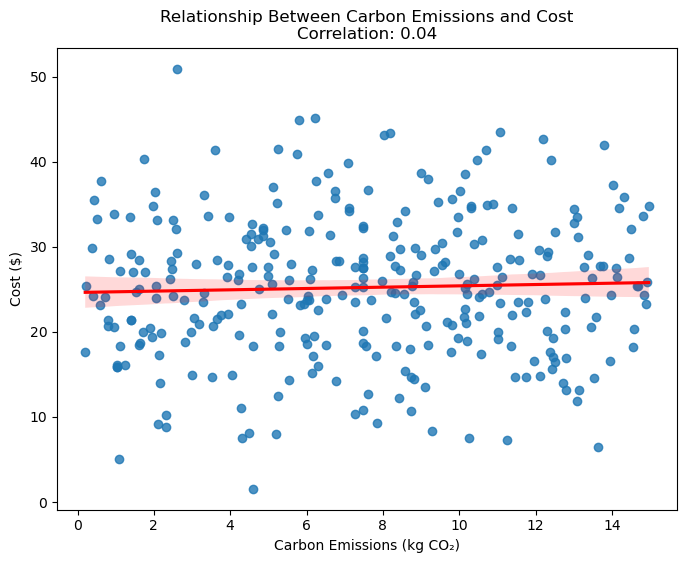

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation coefficient
correlation = df["Carbon_Emissions_kgCO2"].corr(df["Cost_$"])

# Scatter plot of Carbon Emissions vs. Cost with correlation value in title
plt.figure(figsize=(8,6))
sns.regplot(x=df["Carbon_Emissions_kgCO2"], y=df["Cost_$"], line_kws={"color": "red"})
plt.xlabel("Carbon Emissions (kg CO₂)")
plt.ylabel("Cost ($)")
plt.title(f"Relationship Between Carbon Emissions and Cost\nCorrelation: {correlation:.2f}")
plt.show()
